In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
boston = load_boston()
print(dir(boston))

['DESCR', 'data', 'feature_names', 'filename', 'target']


In [3]:
x = pd.DataFrame(boston.data,columns = boston.feature_names)
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

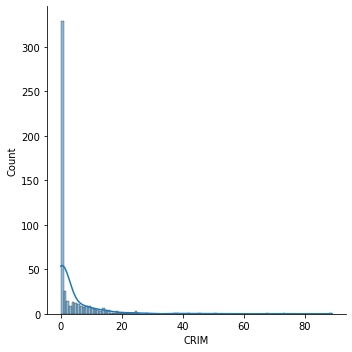

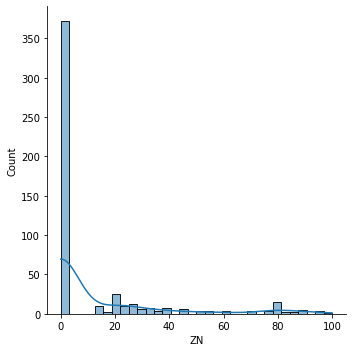

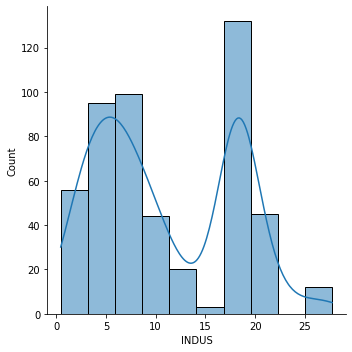

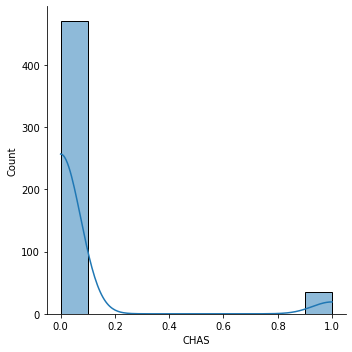

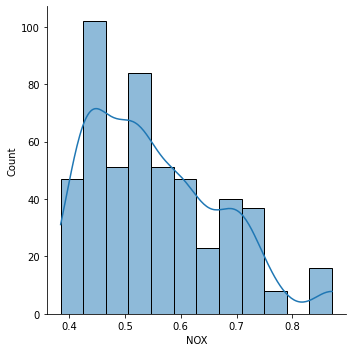

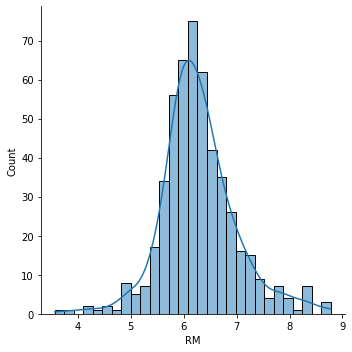

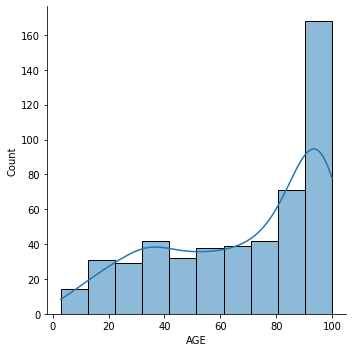

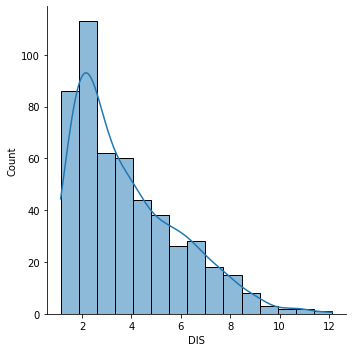

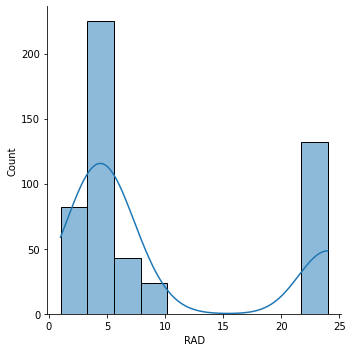

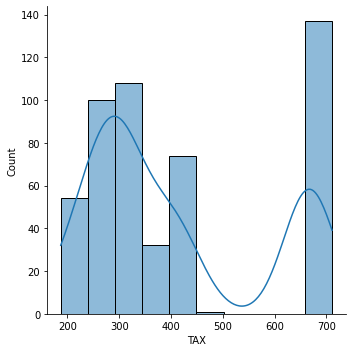

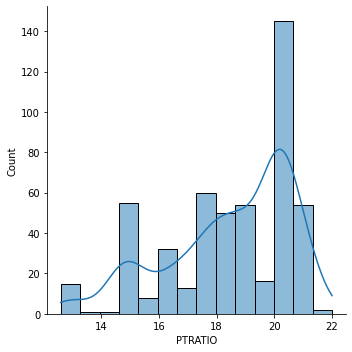

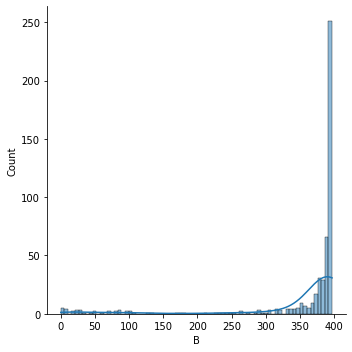

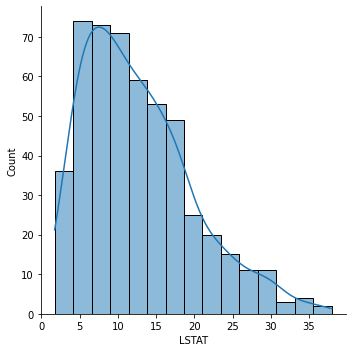

In [4]:
for columns in x:
    sns.displot(x[columns],kde=True)
plt.show()

In [5]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
print(vif)

         vif
0   1.792192
1   2.298758
2   3.991596
3   1.073995
4   4.393720
5   1.933744
6   3.100826
7   3.955945
8   7.484496
9   9.008554
10  1.799084
11  1.348521
12  2.941491


In [6]:
y = boston.target.astype(int)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.25)

In [8]:
model = RandomForestClassifier(n_estimators=10000)
model.fit(x_train,y_train)
model.predict(x_test)
print(model.score(x_test,y_test))

0.2047244094488189
